<a href="https://colab.research.google.com/github/treefield00/PythonNewText4DA/blob/main/python_data_analysis_4_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ▶︎4.4 scikit-learn

## ▶︎4.4.1 前処理

### ●欠損値への対応

In [ ]:
# サンプルDataFrame
import numpy as np
import pandas as pd

df = pd.DataFrame(
    {
        'A':[1, np.nan, 3, 4, 5],
        'B':[6 ,7, 8, np.nan, 10],
        'C':[11, 12, 13, 14, 15]     
    }
)
df

,A,B,C
0,1.0,6.0,11
1,NaN,7.0,12
2,3.0,8.0,13
3,4.0,NaN,14
4,5.0,10.0,15


■ 欠損値の除去

In [ ]:
# isnullメソッド
# 欠損値の確認

df.isnull()

,A,B,C
0,False,False,False
1,True,False,False
2,False,False,False
3,False,True,False
4,False,False,False


欠損値の存在する行または列を除去するには、DataFrameのdropnaメソッドを使う  
→第４章２節　欠損値処理

■欠損値の補完

　pandasのDataFrameのfillnaメソッド  
　→第４章２節　欠損値処理  
　scikit-learnのimputeモジュールのSimpleImputerクラス  
　↓　

In [ ]:
# scikit-learnのimputeモジュールのSimpleImputerクラス
from sklearn.impute import SimpleImputer

# 平均値で欠損値を補完するインスタンスを作成
imp = SimpleImputer(strategy='mean')
# 欠損値を補完
imp.fit(df)
imp.transform(df)

# 引数にはDataFrameを渡すが、
# 戻り値はnumpy配列
# strategy mean;平均　median;中央値　most_frequent:最頻値

array([[ 1.  ,  6.  , 11.  ],
       [ 3.25,  7.  , 12.  ],
       [ 3.  ,  8.  , 13.  ],
       [ 4.  ,  7.75, 14.  ],
       [ 5.  , 10.  , 15.  ]])

### ●カテゴリ変数のエンコーディング

In [ ]:
import pandas as pd
df = pd.DataFrame(
    {
        'A':[1,2,3,4,5],
        'B':['a','b','a','b','c']
    }
)
df

,A,B
0,1,a
1,2,b
2,3,a
3,4,b
4,5,c


■カテゴリ変数のエンコーディング

In [ ]:
# scikit-learn preprocessingモジュールのLabelEncoderクラス
from sklearn.preprocessing import LabelEncoder

# ラベルエンコーダーのインスタンス作成
le = LabelEncoder()

# ラベルのエンコーディング
le.fit(df['B'])
le.transform(df['B'])

array([0, 1, 0, 1, 2])

In [ ]:
# 元の値を確認

le.classes_

array(['a', 'b', 'c'], dtype=object)

■One-hotエンコーディング

　pandas get_dummies関数  
　→第４章２節　組み合わせデータ挿入  
　scikit-learn preprocessingモジュール　OneHotEncoderクラス  
　↓

In [ ]:
# >>>>廃止<<<<<

# ダミー変数化
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# DataFrameをコピー
df_ohe = df.copy()
# ラベルエンコーダのインスタンス化
le = LabelEncoder()
# 英語のa,b,cを1,2,3に変換
df_ohe['B'] = le.fit_transform(df_ohe['B'])
# One-hotエンコーダのインスタンスか
ohe = OneHotEncoder(categorical_features=[1])
# One-hotエンコーディング
ohe.fit_transform(df_ohe).toarray()

# 「categorical_featuresキーワードは0.20で廃止予定となっていて、0.22で削除されます。ColumnTransformerを使用してください」

TypeError: ignored

In [ ]:
# >>>>新<<<<<

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

df_ohe = df.copy()
print(df_ohe)
# ColumnTransformerのインスタンス化
# 変換する列番号１
ct = ColumnTransformer(transformers=[('categorical', OneHotEncoder(),[1])],
                        remainder= 'passthrough')
ct.fit_transform(df_ohe)

   A  B
0  1  a
1  2  b
2  3  a
3  4  b
4  5  c


array([[1., 0., 0., 1.],
       [0., 1., 0., 2.],
       [1., 0., 0., 3.],
       [0., 1., 0., 4.],
       [0., 0., 1., 5.]])

### ●特徴量の正規化

■分散正規化

　特徴量の平均が０、標準偏差が１となるように変換  
　標準化、z変換

　x' = (x - μ) / σ  
　μ：特徴量の平均、σ：標準偏差

In [ ]:
import pandas as pd

df = pd.DataFrame(
    {
        'A':[1,2,3,4,5],
        'B':[100,200,400,500,800]
    }
)
df

,A,B
0,1,100
1,2,200
2,3,400
3,4,500
4,5,800


In [ ]:
# scikit-learn preprocessingモジュール　StandardScalerクラス
# fitメソッド　各列の平均と標準偏差を求め
# transformメソッドにDataFrameを渡して、分散正規化を実行

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()

stdsc.fit(df)
stdsc.transform(df)

array([[-1.41421356, -1.22474487],
       [-0.70710678, -0.81649658],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.40824829],
       [ 1.41421356,  1.63299316]])

■最小最大正規化

特徴量の最小値が０、最大値が１となるように特徴量を正規化する

x' = (x - x_min) / (x_max - x_min)

In [ ]:
# preprocessingモジュール　MinMaxScalerクラス

from sklearn.preprocessing import MinMaxScaler

mmsc = MinMaxScaler()

mmsc.fit(df)
mmsc.transform(df)

array([[0.        , 0.        ],
       [0.25      , 0.14285714],
       [0.5       , 0.42857143],
       [0.75      , 0.57142857],
       [1.        , 1.        ]])

## ▶︎4.4.2 分類

　教師あり学習  
　・サポートベクタマシン  
　・決定木  
　・ランダムフォレスト

### ●分類モデル構築の流れ

学習データセットとテストデータセットの準備

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

print('X:')
print(X[:5,:])
print('y:')
print(y[:5])

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


irisデータセット  
X  
1 Sepal Length がくの長さ  
2 Sepal Width がくの幅  
3 Petal Length 花びらの長さ  
4 Petal Width  花びらの幅
  
y:  Species  
0 Setosa  
1 Versicolor  
2 Virginica

In [ ]:
# model_selectionモジュール
# train_test_split関数
# 第１引数　説明変数（特徴量）　NumPy配列やDataFrame
# 第２引数　目的変数　Numpy配列
# 第３引数　テストデータの割合
# 第４引数　シード値　＞＞不要
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(105, 4)
(45, 4)
(105,)
(45,)


### ●サポートベクタマシン

　分類、回帰、外れ値検出に利用できる  
　決定境界  
　サポートベクタ　各クラスのデータ  
　マージン　クラス間のサポートベクタの距離  
  
　マージンを最大にすることにより決定境界を求める  
　マージンを最大にするのは、決定境界がサポートベクタから遠くなり、多少データが変わっても誤った分類をする可能性を減らせる。  
　未知のデータに対する汎化能力を持たせる

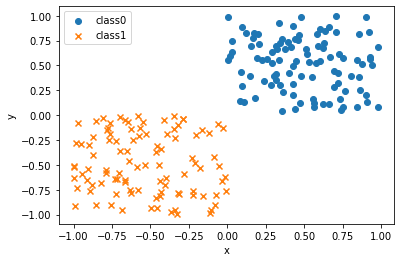

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
np.random.seed(123)

# uniform関数　一様乱数生成　一様分布からデータをサンプリング
# デフォルト　low=0 high=1
# repeat関数　第１引数の値を第２引数回繰り返した、NumPy配列を返す
X0 = np.random.uniform(size=(100, 2))
y0 = np.repeat(0, 100)

X1 = np.random.uniform(-1.0, 0.0, size=(100, 2))
y1 = np.repeat(1, 100)

#散布図
fig, ax = plt.subplots()
ax.scatter(X0[:,0], X0[:,1], marker='o', label='class0')
ax.scatter(X1[:,0], X1[:,1], marker='x', label='class1')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
plt.show()

In [ ]:
print(X0)
print(y0)

[[0.69646919 0.28613933]
 [0.22685145 0.55131477]
 [0.71946897 0.42310646]
 [0.9807642  0.68482974]
 [0.4809319  0.39211752]
 [0.34317802 0.72904971]
 [0.43857224 0.0596779 ]
 [0.39804426 0.73799541]
 [0.18249173 0.17545176]
 [0.53155137 0.53182759]
 [0.63440096 0.84943179]
 [0.72445532 0.61102351]
 [0.72244338 0.32295891]
 [0.36178866 0.22826323]
 [0.29371405 0.63097612]
 [0.09210494 0.43370117]
 [0.43086276 0.4936851 ]
 [0.42583029 0.31226122]
 [0.42635131 0.89338916]
 [0.94416002 0.50183668]
 [0.62395295 0.1156184 ]
 [0.31728548 0.41482621]
 [0.86630916 0.25045537]
 [0.48303426 0.98555979]
 [0.51948512 0.61289453]
 [0.12062867 0.8263408 ]
 [0.60306013 0.54506801]
 [0.34276383 0.30412079]
 [0.41702221 0.68130077]
 [0.87545684 0.51042234]
 [0.66931378 0.58593655]
 [0.6249035  0.67468905]
 [0.84234244 0.08319499]
 [0.76368284 0.24366637]
 [0.19422296 0.57245696]
 [0.09571252 0.88532683]
 [0.62724897 0.72341636]
 [0.01612921 0.59443188]
 [0.55678519 0.15895964]
 [0.15307052 0.69552953]


In [ ]:
# 学習し、決定境界、マージン、サポートベクタを可視化する関数
from sklearn.svm import SVC

def plot_boundary_margin_sv(X0, y0, X1, y1, kernel, C, xmin=-1, xmax=1, ymin=-1,ymax=1):
    # サポートベクタマシンのインスタンス化
    svc = SVC(kernel=kernel, C=C)
    # 学習
    svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))

    fig, ax = plt.subplots()
    ax.scatter(X0[:,0], X0[:,1], marker='o', label='class0')
    ax.scatter(X1[:,0], X1[:,1], marker='x', label='class1')

    # 決定境界とマージンをプロット
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T

    print('xx')
    print(xx.shape)
    print(xx)
    print('yy')
    print(yy.shape)
    print(yy)
    print('xy')
    print(xy.shape)
    print(xy)

    # decision_function 引数で与えられたベクトルXの分離超平面からの距離を返す
    p = svc.decision_function(xy).reshape((100, 100))
    print('p')
    print(p.shape)
    print(p)

    # 登高線
    ax.contour(xx, yy, p,
               colors='k',
               levels=[-1, 0, 1],
               alpha=0.5,
               linestyles=['--', '-', '--']
    )
    
    # print('svc.support_vectors_[:,0]')
    # print(svc.support_vectors_[:,0])

    # サポートベクタをプロット
    ax.scatter(svc.support_vectors_[:,0],
               svc.support_vectors_[:,1],
               s=250,
               facecolors='none',
               edgecolors='black')
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend(loc='best')
    plt.show()


xx
(100, 100)
[[-1.         -0.97979798 -0.95959596 ...  0.95959596  0.97979798
   1.        ]
 [-1.         -0.97979798 -0.95959596 ...  0.95959596  0.97979798
   1.        ]
 [-1.         -0.97979798 -0.95959596 ...  0.95959596  0.97979798
   1.        ]
 ...
 [-1.         -0.97979798 -0.95959596 ...  0.95959596  0.97979798
   1.        ]
 [-1.         -0.97979798 -0.95959596 ...  0.95959596  0.97979798
   1.        ]
 [-1.         -0.97979798 -0.95959596 ...  0.95959596  0.97979798
   1.        ]]
yy
(100, 100)
[[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-0.97979798 -0.97979798 -0.97979798 ... -0.97979798 -0.97979798
  -0.97979798]
 [-0.95959596 -0.95959596 -0.95959596 ... -0.95959596 -0.95959596
  -0.95959596]
 ...
 [ 0.95959596  0.95959596  0.95959596 ...  0.95959596  0.95959596
   0.95959596]
 [ 0.97979798  0.97979798  0.97979798 ...  0.97979798  0.97979798
   0.97979798]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]
xy
(

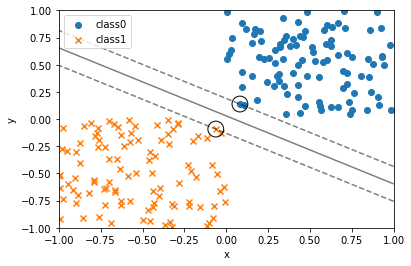

In [ ]:
plot_boundary_margin_sv(X0, y0, X1, y1, kernel='linear', C=1e6)

xx
(100, 100)
[[-1.         -0.97979798 -0.95959596 ...  0.95959596  0.97979798
   1.        ]
 [-1.         -0.97979798 -0.95959596 ...  0.95959596  0.97979798
   1.        ]
 [-1.         -0.97979798 -0.95959596 ...  0.95959596  0.97979798
   1.        ]
 ...
 [-1.         -0.97979798 -0.95959596 ...  0.95959596  0.97979798
   1.        ]
 [-1.         -0.97979798 -0.95959596 ...  0.95959596  0.97979798
   1.        ]
 [-1.         -0.97979798 -0.95959596 ...  0.95959596  0.97979798
   1.        ]]
yy
(100, 100)
[[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-0.97979798 -0.97979798 -0.97979798 ... -0.97979798 -0.97979798
  -0.97979798]
 [-0.95959596 -0.95959596 -0.95959596 ... -0.95959596 -0.95959596
  -0.95959596]
 ...
 [ 0.95959596  0.95959596  0.95959596 ...  0.95959596  0.95959596
   0.95959596]
 [ 0.97979798  0.97979798  0.97979798 ...  0.97979798  0.97979798
   0.97979798]
 [ 1.          1.          1.         ...  1.          1.
   1.        ]]
xy
(

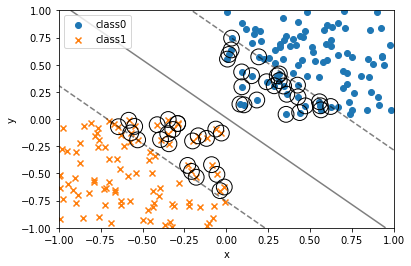

In [ ]:
# Cが大きいほどマージンは狭く、小さいほどマージンは広くなる。
# Cは誤分類を許容する指標
# Cが小さいと誤分類を許容する、大きいと許容しない
# Cが大きい場合は複雑に分類している。
# C複雑に分類すると、学習データはきれいに分類できるが、
# 汎化性能は下がる、テストデータの分類性のは下がる

# ▶︎▶︎ Cを小さくして、誤りをある程度許容すると汎化性能があがる
# 汎化性能はあがるが、コストを下げ過ぎると分類性能が悪くなる

plot_boundary_margin_sv(X0, y0, X1, y1, kernel='linear', C=0.1)

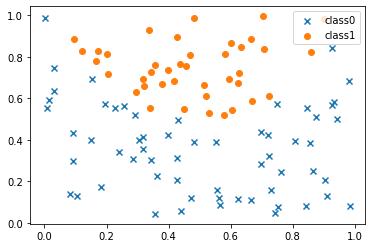

In [ ]:
# 直線で分離できない場合
# y > 2(x - 0.5)**2 + 0.5 :クラス１
# y <= 2(x - 0.5)**2 + 0.5 :クラス0

np.random.seed(123)
X = np.random.random(size=(100,2))
y = (X[:, 1] > 2*(X[:, 0] - 0.5)**2 + 0.5).astype(int)

fig, ax = plt.subplots()
ax.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', label='class0')
ax.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', label='class1')
ax.legend()
plt.show()

xx
(100, 100)
[[0.         0.01010101 0.02020202 ... 0.97979798 0.98989899 1.        ]
 [0.         0.01010101 0.02020202 ... 0.97979798 0.98989899 1.        ]
 [0.         0.01010101 0.02020202 ... 0.97979798 0.98989899 1.        ]
 ...
 [0.         0.01010101 0.02020202 ... 0.97979798 0.98989899 1.        ]
 [0.         0.01010101 0.02020202 ... 0.97979798 0.98989899 1.        ]
 [0.         0.01010101 0.02020202 ... 0.97979798 0.98989899 1.        ]]
yy
(100, 100)
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.01010101 0.01010101 0.01010101 ... 0.01010101 0.01010101 0.01010101]
 [0.02020202 0.02020202 0.02020202 ... 0.02020202 0.02020202 0.02020202]
 ...
 [0.97979798 0.97979798 0.97979798 ... 0.97979798 0.97979798 0.97979798]
 [0.98989899 0.98989899 0.98989899 ... 0.98989899 0.98989899 0.98989899]
 [1.         1.         1.         ... 1.         1.         1.        ]]
xy
(10000, 2)
[[0.         0.        ]
 [0.01010101 0.        ]
 [0.02020202 0.     

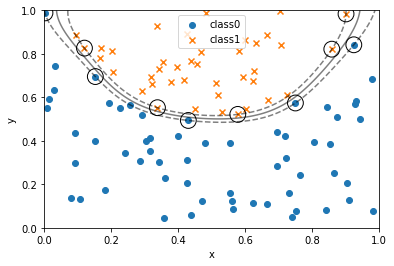

In [ ]:
# SVCクラスの引数　kernel='rbf'
# 動径基底関数　radial basis function

X0, X1 = X[y == 0, :], X[y == 1, :]
y0, y1 = y[y == 0], y[y == 1]
plot_boundary_margin_sv(X0, y0, X1, y1, kernel='rbf', C=1e3, xmin=0, ymin=0)


### ●決定木

情報利得　＝　親ノードでの不純度　ー　子ノードでの不純度の合計  
ジニ不純度、エントロピー、分類誤差  
  
ジニ不純度 各ノードに間違ったクラスが振り分けられる確率  
あるノードにクラス０が振り分けられる確率0.６、クラス１が振り分けられる確率0.4  
クラス０が１に  
0.4×0.6=0.24  
クラス１が０に  
0.6×0.4=0.24  
  
 P(0)(1-P(0))+P(1)(1-P(1))  
=(P(0)+P(1))-(P(0)^2+P(1)^2)
=1-(P(0)^2+P(1)^2)  
=1-ΣP(c)^2  

親ノードのジニ不純度：0.18 左子ノード：0.255 右子ノード0.04875  
情報利得：0.18 - (600/1000)*0.255 - (400/1000)*0.04875 = 0.0075

In [ ]:
# treeモジュール　DecisionTreeCkassifierクラス
# fitメソッド、predictメソッド
# max_depth=3 木の最大深さ３
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# 決定木のインスタンス化
tree = DecisionTreeClassifier(max_depth=3)
# 学習
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# Google drive
# "/content/drive/My Drive/Colab Files/201704health.csv"

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

# scikit-learnで、dot形式のデータを抽出
dot_data = export_graphviz(tree, 
                           filled=True,
                           rounded=True,
                           class_names=['Setosa', 'Versicolor', 'Virginica'],
                           feature_names=['Sepal Length',
                                          'Sepal Width',
                                          'Petal Length',
                                          'Petal Width'],
                           out_file=None)

# pydotplusで、決定木のプロットを出力
graph = graph_from_dot_data(dot_data)
graph.write_png('/content/drive/My Drive/Colab Files/tree.png')

True

In [ ]:
# 予測
y_pred = tree.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

### ●ランダムフォレスト

　データサンプルの特徴量をランダムに選んで決定木を構築する処理を複数回繰り返し、各木の推定結果の多数決や平均値により分類・回帰を行う  
  ブートストラップデータ：ランダムに選択されたサンプルと特徴量のデータ  
  アンサンブル学習

In [ ]:
# ensembleモジュール　RandomForestClassifier
# fit predict
# n_estimators=100 決定木の個数

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=123)

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

## ▶︎4.4.3 回帰

回帰とは、ある目的変数を別の単一または複数の説明変数、特徴量で説明するタスク  
単回帰→　説明変数（単一）：理科の点数　　　　　　目的変数：数学の点数  
重回帰→　説明変数（複数）：物件の広さ、居住地域　目的変数：家賃  
線形回帰　目的変数が、それぞれの説明変数の値の一次式の和で表される  
 y = a_0 + a_1x_1 + ... +a_px_p  
 で、係数a_0,a_1,...,a_pを求める

In [ ]:
# linear_modelモジュールの　LinearRegressionクラス
# Bostonデータセット
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
X, y = boston.data, boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

lr = LinearRegression()

lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(X_train)
print(y_train)

[[2.21880e-01 2.00000e+01 6.96000e+00 ... 1.86000e+01 3.90770e+02
  6.58000e+00]
 [5.36000e-02 2.10000e+01 5.64000e+00 ... 1.68000e+01 3.96900e+02
  5.28000e+00]
 [6.88800e-02 0.00000e+00 2.46000e+00 ... 1.78000e+01 3.96900e+02
  9.45000e+00]
 ...
 [3.51140e-01 0.00000e+00 7.38000e+00 ... 1.96000e+01 3.96900e+02
  7.70000e+00]
 [9.18702e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.96900e+02
  2.36000e+01]
 [4.55587e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.54700e+02
  7.12000e+00]]
[35.2 25.  36.2 16.1 10.9 36.4 25.  20.1 16.8 23.7 42.3 17.9 12.7 50.
 18.4 33.4 22.9 14.6 29.9 22.6 22.5 29.  50.  37.9 21.4 29.4 20.3 23.
 30.1 21.7 36.5 25.  24.5 37.3 33.8 24.7 32.7 23.1 25.1 21.7 13.4 24.8
 12.7 11.8  8.3 20.2 41.3 23.2 23.1 24.3 19.3 10.8 18.6 29.  23.9 19.5
 13.1 31.7 21.  18.2 21.  21.2 14.1 33.2 13.8 19.9 21.7 20.6 21.2 13.6
 18.9 18.  24.1 28.7 23.4 15.2 23.6 13.8 11.7 16.3 50.  13.5 50.  31.5
 22.6 12.1 21.7 14.1 22.4 13.4 33.1 20.6  8.3 36.2  6.3 21.5 23.3 24.
 19.1 29.6 27.

In [ ]:
# 予測
y_pred = lr.predict(X_test)

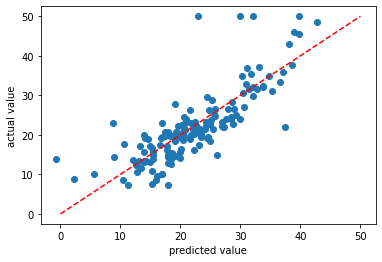

In [ ]:
# 検証
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.plot((0,50),(0,50), linestyle='dashed', color='red')
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

## ▶︎4.4.4 次元削減

### ●主成分分析

PCA Principal Component Analysis 

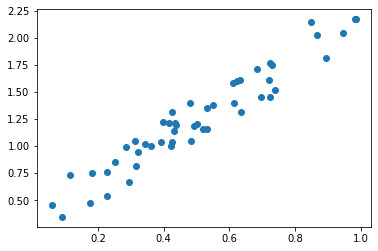

[0.69646919 0.28613933 0.22685145 0.55131477 0.71946897 0.42310646
 0.9807642  0.68482974 0.4809319  0.39211752 0.34317802 0.72904971
 0.43857224 0.0596779  0.39804426 0.73799541 0.18249173 0.17545176
 0.53155137 0.53182759 0.63440096 0.84943179 0.72445532 0.61102351
 0.72244338 0.32295891 0.36178866 0.22826323 0.29371405 0.63097612
 0.09210494 0.43370117 0.43086276 0.4936851  0.42583029 0.31226122
 0.42635131 0.89338916 0.94416002 0.50183668 0.62395295 0.1156184
 0.31728548 0.41482621 0.86630916 0.25045537 0.48303426 0.98555979
 0.51948512 0.61289453]
[1.4532527  0.98544907 0.75523297 1.37516354 1.61031986 0.99827331
 2.1700395  1.71030986 1.39959222 1.03944621 1.02101292 1.75106769
 1.18959624 0.45670032 1.21725973 1.51758831 0.74682488 0.4727367
 1.16021423 1.34988365 1.31665818 2.141527   1.76253514 1.5837552
 1.45295137 0.94313377 1.00196991 0.53600628 0.66396335 1.60971701
 0.34359309 1.21338749 1.13891715 1.18184548 1.31422683 1.04535744
 1.0314014  1.80857406 2.04070407 1.20276

In [ ]:
# x軸　０位上１未満の一様乱数
# y軸　xの２倍＋（０位上１未満の一様乱数を0.５倍）

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(123)

X = np.random.random(size=50)

Y = 2*X + 0.5*np.random.rand(50)

fig, ax = plt.subplots()
ax.scatter(X, Y)
plt.show()

print(X)
print(Y)


In [ ]:
# PCAクラスのfit_transformメソッド
# 引数　NumPy配列　行がデータのサンプル　列が各次元
# 50×2
# PCAクラスのインスタンス化引数　n_components=2 
# 主成分分析により、新たな２変数に変換する
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
# 主成分分析を実行
X_pca = pca.fit_transform(np.hstack((X[:, np.newaxis], Y[:, np.newaxis])))

print(np.hstack((X[:, np.newaxis], Y[:, np.newaxis])))


[[0.69646919 1.4532527 ]
 [0.28613933 0.98544907]
 [0.22685145 0.75523297]
 [0.55131477 1.37516354]
 [0.71946897 1.61031986]
 [0.42310646 0.99827331]
 [0.9807642  2.1700395 ]
 [0.68482974 1.71030986]
 [0.4809319  1.39959222]
 [0.39211752 1.03944621]
 [0.34317802 1.02101292]
 [0.72904971 1.75106769]
 [0.43857224 1.18959624]
 [0.0596779  0.45670032]
 [0.39804426 1.21725973]
 [0.73799541 1.51758831]
 [0.18249173 0.74682488]
 [0.17545176 0.4727367 ]
 [0.53155137 1.16021423]
 [0.53182759 1.34988365]
 [0.63440096 1.31665818]
 [0.84943179 2.141527  ]
 [0.72445532 1.76253514]
 [0.61102351 1.5837552 ]
 [0.72244338 1.45295137]
 [0.32295891 0.94313377]
 [0.36178866 1.00196991]
 [0.22826323 0.53600628]
 [0.29371405 0.66396335]
 [0.63097612 1.60971701]
 [0.09210494 0.34359309]
 [0.43370117 1.21338749]
 [0.43086276 1.13891715]
 [0.4936851  1.18184548]
 [0.42583029 1.31422683]
 [0.31226122 1.04535744]
 [0.42635131 1.0314014 ]
 [0.89338916 1.80857406]
 [0.94416002 2.04070407]
 [0.50183668 1.20276619]


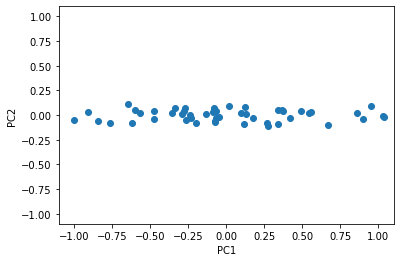

[[ 2.65453143e-01 -8.38088940e-02]
 [-3.37202083e-01  7.11669243e-02]
 [-5.69391130e-01  2.01497553e-02]
 [ 1.30249181e-01  1.04652303e-02]
 [ 4.15989354e-01 -3.34310249e-02]
 [-2.63931026e-01 -4.52624826e-02]
 [ 1.03338789e+00 -1.39290318e-02]
 [ 4.89575970e-01  4.26142718e-02]
 [ 1.20276126e-01  8.42964348e-02]
 [-2.41180266e-01  9.75211441e-04]
 [-2.79720201e-01  3.63239619e-02]
 [ 5.45906096e-01  2.15542788e-02]
 [-8.62286343e-02  2.73013679e-02]
 [-9.11240534e-01  3.45625230e-02]
 [-7.98385481e-02  7.59527126e-02]
 [ 3.41606184e-01 -9.18220640e-02]
 [-5.96918059e-01  5.59373115e-02]
 [-8.44669988e-01 -6.15057574e-02]
 [-7.04754473e-02 -6.89288676e-02]
 [ 9.88948353e-02  1.64425236e-02]
 [ 1.15549322e-01 -9.00837969e-02]
 [ 9.48661450e-01  9.03906391e-02]
 [ 5.54064782e-01  3.08304029e-02]
 [ 3.43332312e-01  5.13454623e-02]
 [ 2.76909157e-01 -1.07122184e-01]
 [-3.58340256e-01  1.92107516e-02]
 [-2.88311694e-01  1.11212117e-02]
 [-7.64373946e-01 -8.00701788e-02]
 [-6.20650575e-01 -8

In [ ]:

fig, ax = plt.subplots()
ax.scatter(X_pca[:, 0], X_pca[:, 1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_xlim((-1.1, 1.1))
ax.set_ylim((-1.1, 1.1))
plt.show()

print(X_pca)

## ▶︎4.4.5 モデルの評価

・カテゴリの分類精度  
・予測確率の正確さ

### ●カテゴリの分類精度

・適合率　precision  
・再現率　recall  
・F値　F-value  
・正解率　accuracy  
混同行列　confusion matrix

tp True Positive 真陽性  
fp False Positive 偽陽性  
fn False Nagative 偽陰性  
tn True Negative 真陰性

・適合率　正例と予測したデータのうち、実際に正例の割合   
　予測するクラスをできるだけ間違えたくない時に重視  
　= tp / (tp + fp)  
・再現率　実際の正例のうち、正例と予測したものの割合  
　= tp / (tp + fn)  
・F値　F-value　適合率と再現率の調和平均  
　一般的に適合率と再現率はトレードオフ  
　F値は両方の指標がバランス良い値になることを目指す  
　= 2 / (1 / 適合率 + 1 / 再現率)  
　= 2 * 適合率 * 再現率 / (適合率 + 再現率)   
・正解率　accuracy  予測と実績が一致したデータの割合  
　= (tp + tn) / (tp + fp + fn + tn)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data[:100, :], iris.target[:100]
# 分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
# SVMインスタンス化
svc = SVC()
# SVMで学習
svc.fit(X_train, y_train)
# テストデータセットの予測
y_pred = svc.predict(X_test) 

In [ ]:
from sklearn.metrics import classification_report
# 適合率、再現率、F値を出力
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



交差検証　cross validation

　k分割交差検証  
　１０分割交差検証　10-fold cross validation  
　層化k分割交差検証　stratified k-fold cross validation  
　　→目的変数（クラスラベル）の割合が一定となるk分割交差検証

In [ ]:
# model_selectionモジュールの　cross_val_score関数
# は層化k分割交差検証を行う
# cv引数に分割数、scoring引数に評価指標　precision, recall, f1-score, accracy
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC()

cross_val_score(svc, X, y, cv=10, scoring='precision')

# ↓結果は適合率が１０回とも１となる

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

### ●予測確率の正確さ

・ROC曲線　Reciever Operating Charactaristic  
・AUC　Area Under the Curve

　　ROC曲線　予測確率の高い順に並べた時、上から順にそこまでは正例と予測したとして、真陽性率、偽陽性率を計算  
　　表４.6を参照  
　　横軸に偽陽性率、縦軸に真陽性率をプロット

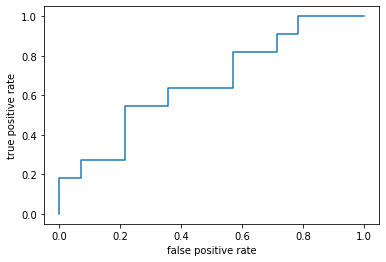

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# 偽陽性率と真陽性率を算出
fpr = np.array([0,0,0,1,1,2,3,3,3,3,4,5,5,6,7,8,8,8,9,10,10,11,11,11,13,14]) / 14
tpr = np.array([0,1,2,2,3,3,3,4,5,6,6,6,7,7,7,7,8,9,9,9,10,10,10,11,11,11]) / 11
# ROC曲線をプロット
fig, ax = plt.subplots()
ax.step(fpr,tpr)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
plt.show()

・AUCの値が１に近づくほど確率が相対的に高いサンプルが正例、相対的低サンプルが負例となる傾向が高まる。この時確率の大きさによって正例負例を区別できる。  
　　→このようなモデルはクラスを分類する能力が高い  
・AUCの値が0.5に近づくと、確率の大きさによって正例と負例を区別することができず、正例と負礼がランダムに混じっていることを示す

In [ ]:
# ROC曲線の元となる真陽性率、偽陽性率の計算
# metoricsモジュールの　roc_curve関数
from sklearn.metrics import roc_curve

# 各ユーザが退会したかどうかのラベル
labels = np.array([1,1,0,1,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0])

# 各ユーザの予測退会率
probs = np.array([0.98,0.95,0.9,0.87,0.85,
                 0.8,0.75,0.71,0.63,0.55,
                 0.51,0.47,0.43,0.38,0.35,
                 0.31,0.28,0.24,0.22,0.19,
                 0.15,0.12,0.08,0.04,0.01])

# 偽陽性率、真陽性率、閾値を産出
fpr, tpr, threshold = roc_curve(labels, probs)
print('偽陽性率', fpr)
print('真陽性率', tpr)

偽陽性率 [0.         0.         0.         0.07142857 0.07142857 0.21428571
 0.21428571 0.35714286 0.35714286 0.57142857 0.57142857 0.71428571
 0.71428571 0.85714286 0.85714286 1.        ]
真陽性率 [0.         0.09090909 0.18181818 0.18181818 0.27272727 0.27272727
 0.54545455 0.54545455 0.63636364 0.63636364 0.81818182 0.81818182
 0.90909091 0.90909091 1.         1.        ]


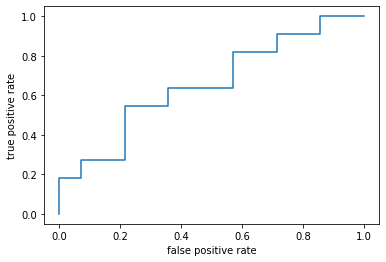

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ROC曲線をプロット
fig, ax = plt.subplots()

ax.step(fpr,tpr)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
plt.show()

In [ ]:
# AUC
# metricsモジュール　ros_auc_score関数
# 第１引数：クラスラベル　第２引数：確率
from sklearn.metrics import roc_auc_score

roc_auc_score(labels, probs)



0.6558441558441558

## ▶︎4.4.6 ハイパーパラメータの最適化

・グリッドサーチ  
・ランダムサーチ  
グリッドサーチと交差検証の組み合わせ

In [ ]:
# GridSearchCVクラス
# １０分割の交差検証、決定ボックの深さの最適値
# param_grid引数に、引数名と値のリストを辞書で渡す
# cv引数 StratifiedKFoldクラスやKFoldクラスのインスタンスを明示的に指定しなければ、実行結果は毎回変わる

from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

clf = DecisionTreeClassifier()
param_grid = {'max_depth':[3,4,5]}

cv = GridSearchCV(clf,param_grid=param_grid, cv=10)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None, param_grid={'max_depth': [3, 4, 5]},
             pre_dispatch='2*n_jobs', re

In [ ]:
# 最適な深さを確認する
cv.best_params_

{'max_depth': 3}

In [ ]:
# 最適なモデルを確認する
cv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
# 推定された最適なモデルで予測を行う
y_pred = cv.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

## ▶︎4.4.7 クラスタリング

教師なし学習  
・k-means  
・階層的クラスタリング

### ●k-means

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data
# 1,3行目を抽出
X = data[:100, [0,2]]

type(iris.data)

numpy.ndarray

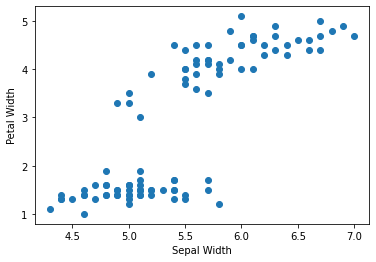

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1])
ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
plt.show()

In [ ]:
# clusterモジュールの　KMeansクラス
# インスタンス化の引数
#　n_cluster:クラスタ数
# init:random,k-means++(初期のクラスタ中心が離れた位置に)
# n_init:k-meansを実行する回数、,
# max_iter:k-meansで反復する最大回数
# tol:k-meansの収束を判定する許容誤差
# random_state:乱数のシード固定指定用整数
# fit_predictメソッド
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random', n_init=10, random_state=123)

y_km = km.fit_predict(X)

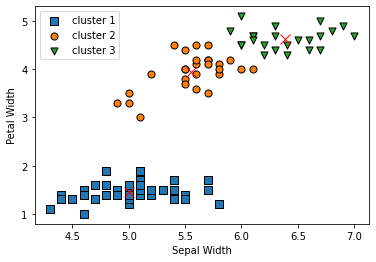

In [ ]:
import numpy as np

fid, ax = plt.subplots()

# 散布図　クラスタ１
ax.scatter(X[y_km == 0, 0], X[y_km == 0, 1], s=50, 
           edgecolor='black', marker='s', label='cluster 1')
# クラスタ中心　クラスタ１
ax.plot(np.mean(X[y_km == 0, 0]), np.mean(X[y_km == 0, 1]),
        marker='x', markersize=10, color='red')

# 散布図　クラスタ２
ax.scatter(X[y_km == 1, 0], X[y_km == 1, 1], s=50, 
           edgecolor='black', marker='o', label='cluster 2')
# クラスタ中心　クラスタ２
ax.plot(np.mean(X[y_km == 1, 0]), np.mean(X[y_km == 1, 1]),
        marker='x', markersize=10, color='red')

# 散布図　クラスタ３
ax.scatter(X[y_km == 2, 0], X[y_km == 2, 1], s=50, 
           edgecolor='black', marker='v', label='cluster 3')
# クラスタ中心　クラスタ３
ax.plot(np.mean(X[y_km == 2, 0]), np.mean(X[y_km == 2, 1]),
        marker='x', markersize=10, color='red')

ax.set_xlabel('Sepal Width')
ax.set_ylabel('Petal Width')
ax.legend()
plt.show()

### ●階層的クラスタリング

・凝集型　似ているデータで小さなクラスタ→最終的に１つのクラスタ  
・分割型　最初に全てのデータが１つのクラスタ→順次クラスタを分割していく

In [ ]:
# clusterモジュール　Agglomerativeクラス
# ユークリッド距離
# 最長距離法　２つのクラスタをまとめるときに、各クラスタに属するデータのうち最も遠い距離をクラスタ間の距離とする
# 最終的にクラスタ数３の場合を抽出

from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')

labels = ac.fit_predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0])

樹形図（デンドログラム）

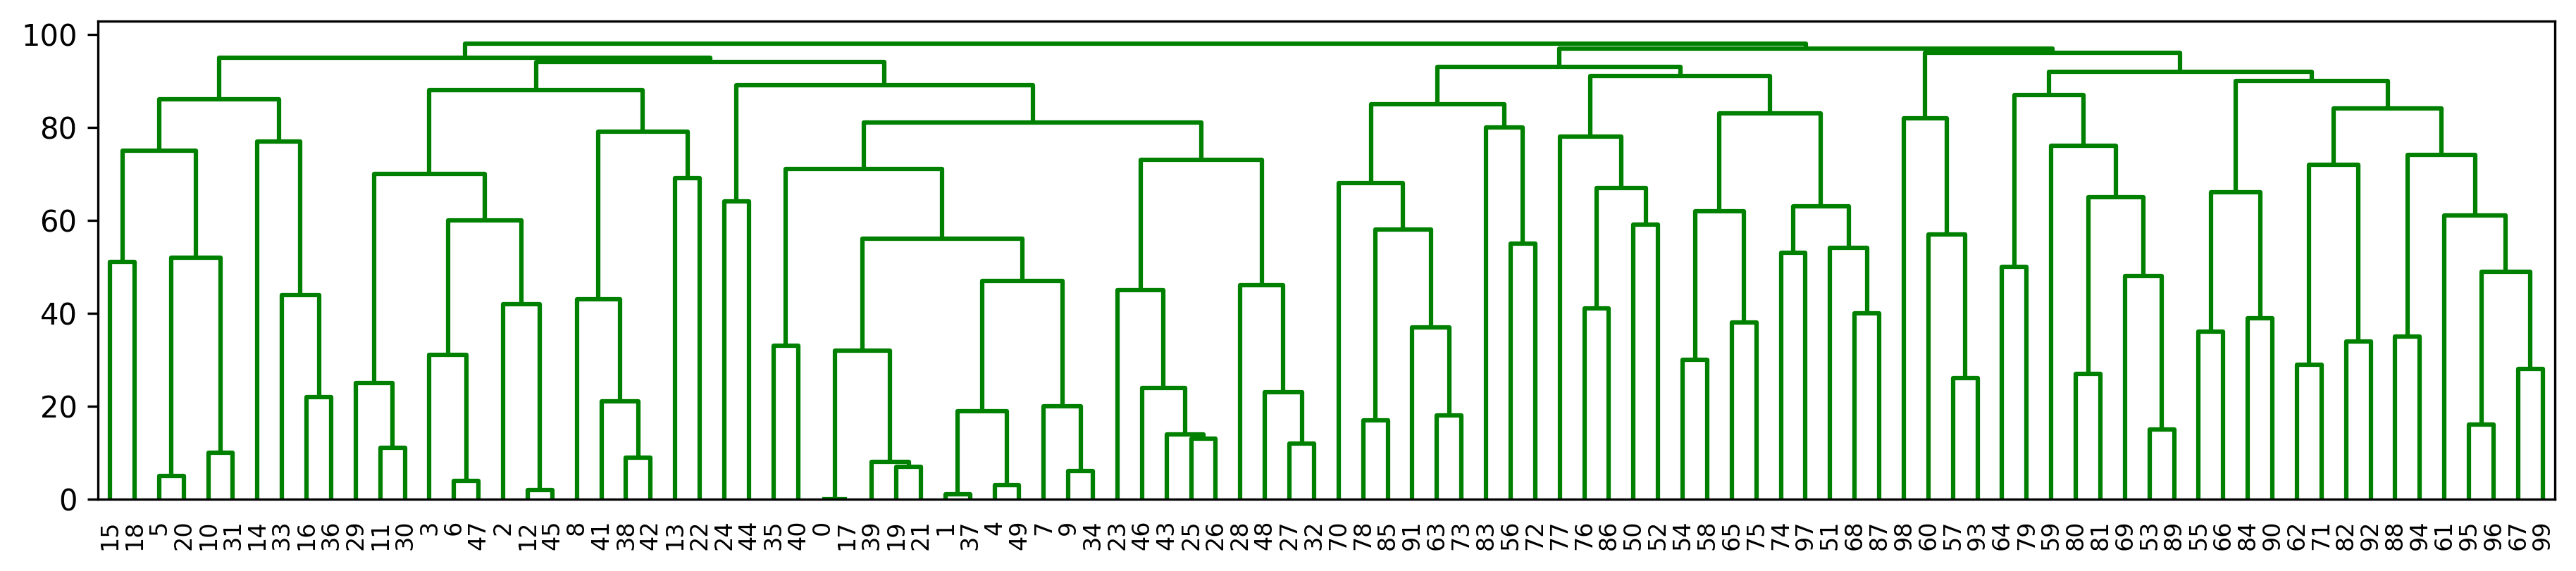

[[  0  17]
 [  1  37]
 [ 12  45]
 [  4  49]
 [  6  47]
 [  5  20]
 [  9  34]
 [ 19  21]
 [ 39 107]
 [ 38  42]
 [ 10  31]
 [ 11  30]
 [ 27  32]
 [ 25  26]
 [ 43 113]
 [ 53  89]
 [ 95  96]
 [ 78  85]
 [ 63  73]
 [101 103]
 [  7 106]
 [ 41 109]
 [ 16  36]
 [ 48 112]
 [ 46 114]
 [ 29 111]
 [ 57  93]
 [ 80  81]
 [ 67  99]
 [ 62  71]
 [ 54  58]
 [  3 104]
 [100 108]
 [ 35  40]
 [ 82  92]
 [ 88  94]
 [ 55  66]
 [ 91 118]
 [ 65  75]
 [ 84  90]
 [ 68  87]
 [ 76  86]
 [  2 102]
 [  8 121]
 [ 33 122]
 [ 23 124]
 [ 28 123]
 [119 120]
 [ 69 115]
 [116 128]
 [ 64  79]
 [ 15  18]
 [105 110]
 [ 74  97]
 [ 51 140]
 [ 56  72]
 [132 147]
 [ 60 126]
 [117 137]
 [ 50  52]
 [131 142]
 [ 61 149]
 [130 138]
 [153 154]
 [ 24  44]
 [127 148]
 [136 139]
 [141 159]
 [ 70 158]
 [ 13  22]
 [125 160]
 [133 156]
 [129 134]
 [145 146]
 [135 161]
 [151 152]
 [ 59 165]
 [ 14 144]
 [ 77 167]
 [143 169]
 [ 83 155]
 [171 173]
 [ 98 157]
 [162 163]
 [172 174]
 [168 180]
 [175 177]
 [150 176]
 [170 179]
 [164 181]
 [166 184]

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram

# 子クラスタとの関係を抽出
children = ac.children_
# クラスタ間の距離を抽出
distance = np.arange(children.shape[0])
# 各データの観測番号
no_of_observations = np.arange(2, children.shape[0]+2)
# 子クラスタ、クラスタ間の距離、観測番号を列方向に結合
linkage_matrix = np.hstack((children,
                            distance[:, np.newaxis],
                            no_of_observations[:, np.newaxis])).astype(float)
# 樹形図をプロット
fig, ax = plt.subplots(figsize=(15,3), dpi=300)
dendrogram(linkage_matrix, labels=np.arange(100), leaf_font_size=8, color_threshold=np.inf)
plt.show()

print(children)
print(distance)
print(no_of_observations)
print(linkage_matrix)
